<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Introduction_to_DL_framework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image classification**

**Load data & pre-process**

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("Data shape: ", X_train.shape)
print("Label shape: ", Y_train.shape)

Data shape:  (60000, 28, 28, 1)
Label shape:  (60000, 10)


**Show some random sample**

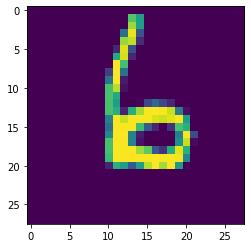

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
plt.imshow(X_train.reshape(X_train.shape[0], 28, 28)[rnd_int])

**Define CNN model**

In [ ]:
from keras.utils.vis_utils import plot_model

def build_model():
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
  # Model's parameter initialization
  num_filters = 8
  filter_size = 3
  pool_size = 2
  input_shape = (28, 28, 1)
  no_classes = 10

  # Model's architecture initializtion/inception
  model = Sequential([
                      Convolution2D(num_filters, filter_size, 
                                    activation='relu', input_shape=input_shape),
                      MaxPooling2D(pool_size=pool_size),
                      # Dropout(0.25),
                      # Convolution2D(num_filters*2, filter_size, activation='relu'),
                      # MaxPooling2D(pool_size=pool_size),
                      # Dropout(0.25),
                      Flatten(),
                      # Dense(num_filters*8, activation='relu'),
                      Dense(no_classes, activation='softmax'),
                      ])
  print("Model build.")
  return model

  
# Define our CNN model
myCNN = build_model()

# Show myCNN
print(myCNN.summary())
plot_model(myCNN, to_file='myCNN_plot.png', show_shapes=True, show_layer_names=True)

**Compile myCNN**

In [ ]:
myCNN.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

**Fit myCNN**

In [ ]:
history = myCNN.fit(
    X_train,
    Y_train,
    epochs=3,
    validation_data=(X_test, Y_test),
    batch_size=10, verbose=2
    )

# Saving myCNN weight
myCNN.save_weights('myCNN_mnist.h5')
print("myCNN weight is saved.")

In [ ]:
plt.figure(figsize=(5, 5))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

**Prediction with trained myCNN**

In [ ]:
# Build the myCNN.
myCNN = build_model()

# Load the myCNN's saved weights.
myCNN.load_weights('myCNN_mnist.h5')
print("Weight loaded.")

Model build.


predictions:  [8]


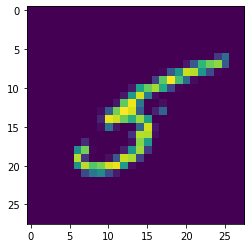

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

rnd_int = np.random.randint(X_train.shape[0], size=1)[0]
sample = X_train[rnd_int]
true_label = Y_train[rnd_int]

# Generate predictions for samples
plt.imshow(np.squeeze(sample, 2))
predictions = myCNN.predict_classes(np.expand_dims(sample, axis=0))
print("myCNN predictions: ", predictions)
print("True label: ", true_label)
